<a href="https://colab.research.google.com/github/kboodlal/Machine_Learning_Blog_Code/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import os
import pandas
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
path = '/content/drive/My Drive/Colab Notebooks/'
LoL_data = os.path.join(path, 'League_of_Legends_stats.csv')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Gold = 25.267038790211238 cs + 7499.623067897274


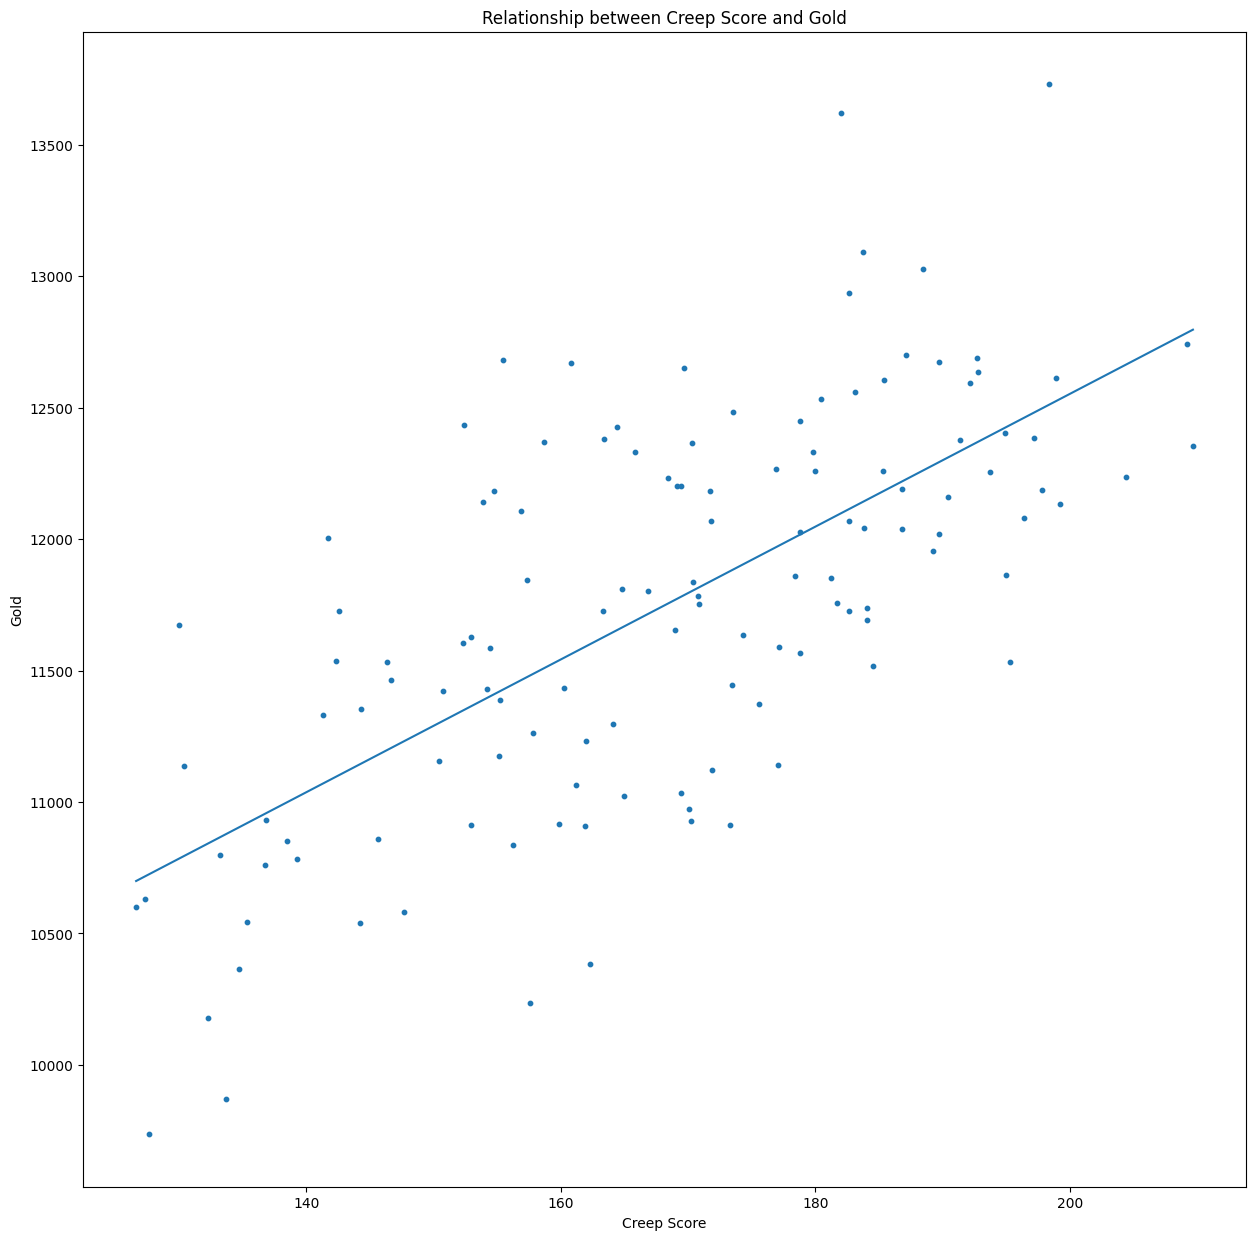

In [2]:
league_data = pandas.read_csv(LoL_data)
league_data['Gold'] = league_data['Gold'].map(lambda s: int(s.replace(",", "")))
league_no_support = league_data[league_data['CS'] >= 125]
league_no_support = league_no_support.sort_values(by='CS', ascending=True)
plot = league_no_support.plot.scatter('CS', 'Gold', s=10, figsize=(15, 15))
lin_reg = LinearRegression()
lin_reg.fit(league_no_support['CS'].values.reshape(-1, 1), league_no_support['Gold'].values.reshape(-1, 1))
line = lin_reg.predict(league_no_support['CS'].values.reshape(-1, 1))
print("Gold =", lin_reg.coef_[0][0], "cs +", lin_reg.intercept_[0])
plt.xlabel("Creep Score")
plt.title("Relationship between Creep Score and Gold")
league_no_support['Gold Prediction'] = line
plot.add_line(matplotlib.lines.Line2D(league_no_support['CS'], league_no_support['Gold Prediction']))
plt.show()

In [3]:
league_no_support['diff'] = abs(league_no_support['Gold'] - league_no_support['Gold Prediction'])
league_no_support['diff percentage'] = league_no_support['diff'] / league_no_support['Gold'] * 100
print("Is on average off by", np.average(league_no_support['diff']), "gold")
print("Is on average off by", np.average(league_no_support['diff percentage']), "%")

Is on average off by 443.8564830268101 gold
Is on average off by 3.798443643945201 %
